In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")

In [3]:
from src.bayesian_PSL import PlayerComparison, RandomVariablePSL, TeamPSL, EPL_Data

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
EPL_Full_Data = EPL_Data(
    "../SampleData/epl.xlsx", "../SampleData/players.json", "R_storage.npy"
)

# epl = EPL_Full_Data.get_epl()
# epl_player_data = EPL_Full_Data.get_epl_player_data()
# R_storage = EPL_Full_Data.get_r_storage()
# Q_storage = EPL_Full_Data.get_q_storage()
# partidos = EPL_Full_Data.get_partidos()
# tp_ds = EPL_Full_Data.get_transition_prob_dataset()
# player_ids = EPL_Full_Data.get_player_ids()
# player_kdes = EPL_Full_Data.get_player_kdes()

In [69]:
EPL_Full_Data.epl.columns

Index(['season_id', 'match_id', 'home_team_id', 'home_team_name',
       'away_team_id', 'away_team_name', 'id', 'event_id', 'date', 'time',
       'period_id', 'min', 'sec', 'team_id', 'player_id', 'playerName',
       'playerPosition', 'x', 'y', 'type', 'description', 'outcome'],
      dtype='object')

In [6]:
EPL_Full_Data.get_player_total_duration(
    float(EPL_Full_Data.get_epl_player_data().get_player_id_by_name("Sergio Agüero"))
)

3366.3499999999995

In [7]:
EPL_Full_Data.get_player_total_duration(
    float(EPL_Full_Data.get_epl_player_data().get_player_id_by_name("Magaye Gueye"))
)

132.7

In [8]:
EPL_Full_Data.get_epl_player_data().get_player_id_by_name("Lukas Podolski")

17733

In [9]:
team_psl = TeamPSL(EPL_Full_Data)
team_psl.set_team("Manchester City")

player_comparison = PlayerComparison(team_psl)

# sorted_rankings = player_comparison.rank_players(
#     "Sergio Agüero",
#     [
#         "Olivier Giroud",
#         "Wayne Rooney",
#         "Romelu Lukaku",
#     ],
# )

# sorted_rankings

In [10]:
og_list = team_psl.calculate_top_11_players()
psl_aguero = team_psl.estimate_psl_distribution(1000, og_list)
psl_giroud = team_psl.estimate_psl_distribution(
    1000,
    team_psl.replace_player("Sergio Agüero", "Olivier Giroud"),
)

100%|██████████| 1000/1000 [01:16<00:00, 13.13it/s]


Finding replacement for player with same position
Old Player: Sergio Agüero - 37572
Old Player Position: F
[15749.0, 14664.0, 20658.0, 1632.0, 17336.0, 17476.0, 42544.0, 20664.0, 20312.0, 7551.0, 37572.0]
['G', 'M', 'D', 'M', 'D', 'D', 'F', 'M', 'F', 'D', 'F']


100%|██████████| 1000/1000 [01:12<00:00, 13.80it/s]


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

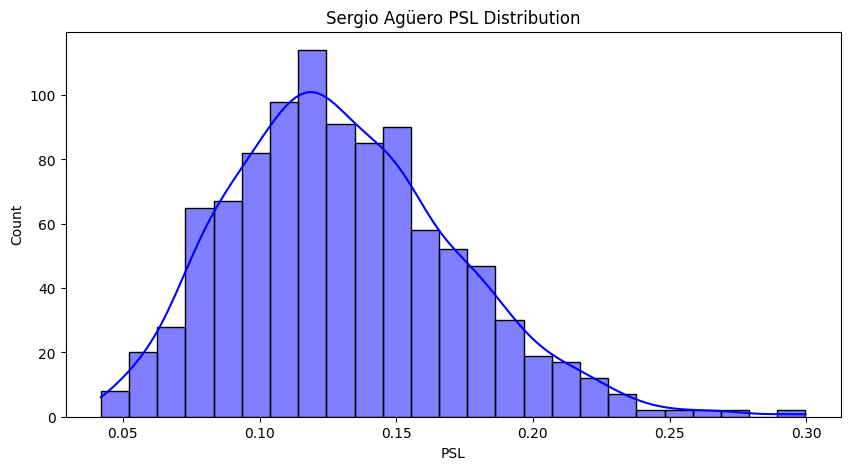

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.histplot(psl_aguero, ax=ax, color="blue", label="Sergio Agüero", kde=True)

ax.set_title("Sergio Agüero PSL Distribution")

ax.set_xlabel("PSL")

plt.show()

# save fig
fig.savefig("../recursos_pdf/graficos/sergio_aguero_psl_distribution.png")

In [13]:
import matplotlib.pyplot as plt

(0.0, 0.35)

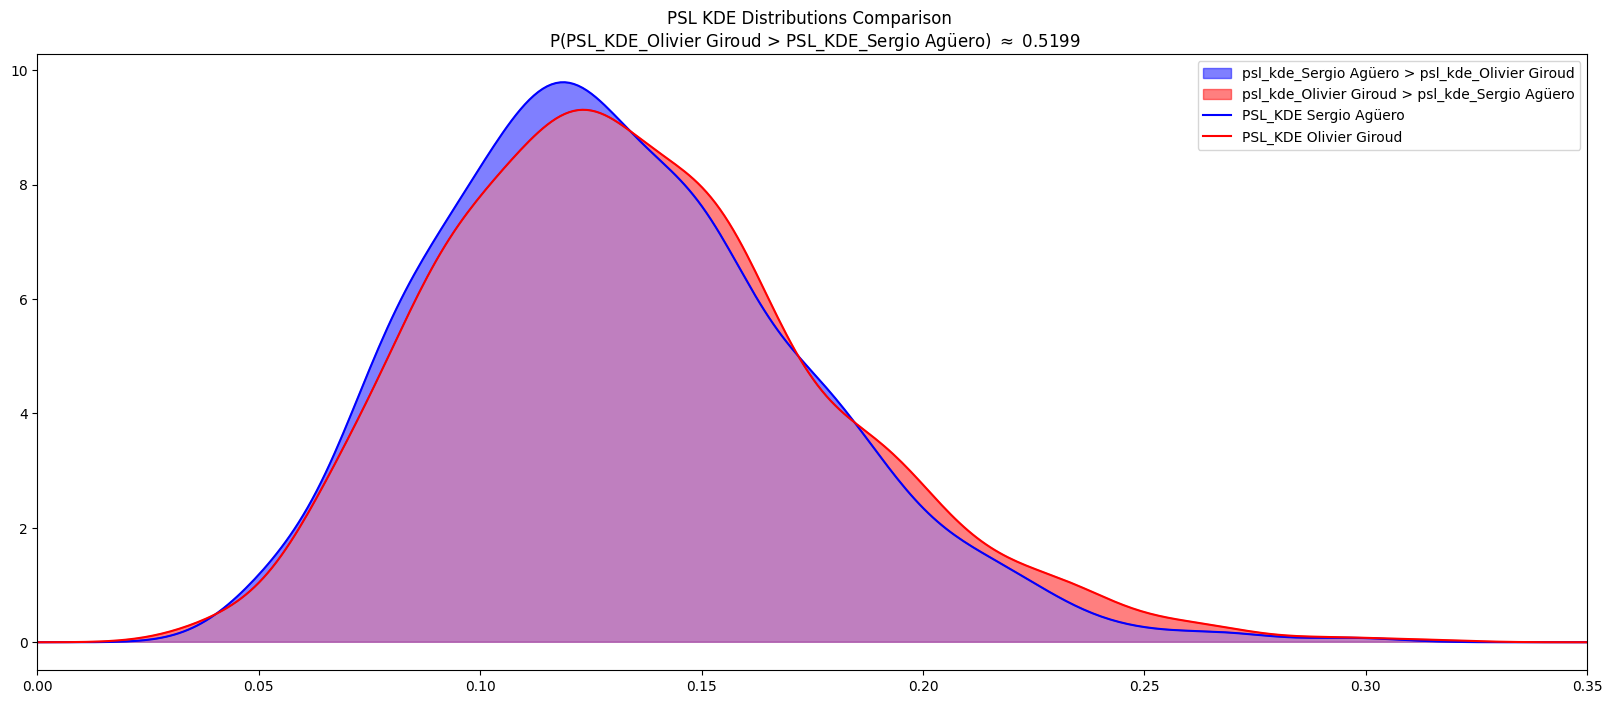

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))

RandomVariablePSL.plot_psl_distributions(
    psl_aguero, psl_giroud, ax=ax, names=["Sergio Agüero", "Olivier Giroud"], colors=["b", "r"]
)

ax.set_xlim(0, 0.35)

(0.0, 0.35)

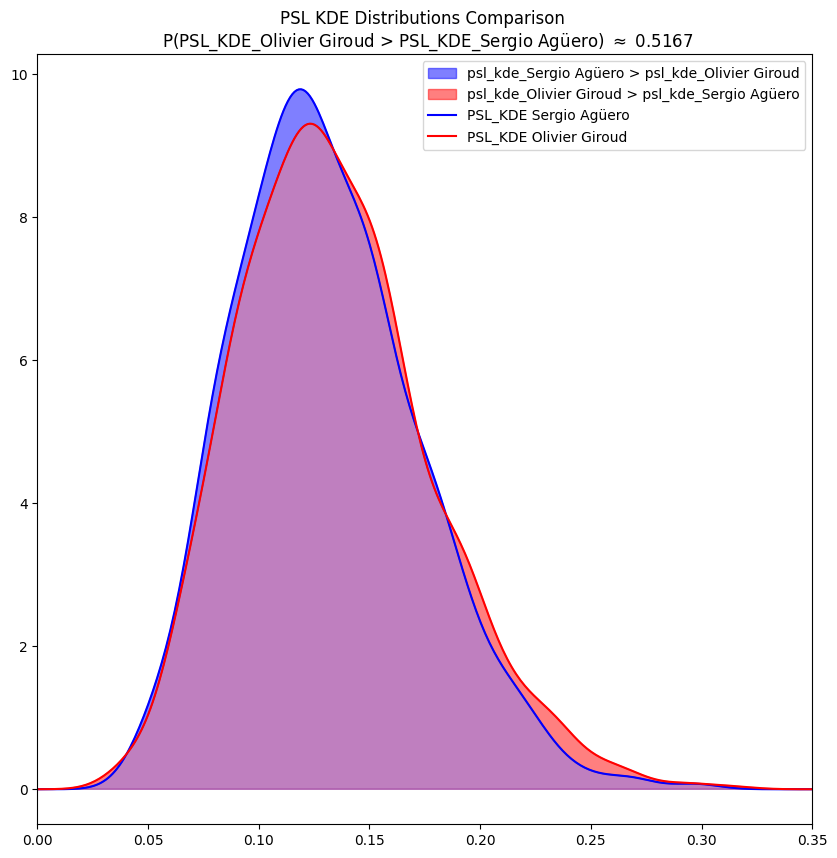

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

RandomVariablePSL.plot_psl_distributions(
    psl_aguero,
    psl_giroud,
    ax=ax,
    names=["Sergio Agüero", "Olivier Giroud"],
    colors=["b", "r"],
)

ax.set_xlim(0, 0.35)

In [40]:
import pandas as pd

In [43]:
!pip install tabulate

In [68]:
from scipy.stats import skew, kurtosis

table = pd.DataFrame(
    [
        np.mean(psl_aguero),
        np.mean(psl_giroud),
        np.var(psl_aguero),
        np.var(psl_giroud),
        np.std(psl_aguero),
        np.std(psl_giroud),
        skew(psl_aguero),
        skew(psl_giroud),
        kurtosis(psl_aguero),
        kurtosis(psl_giroud),
    ],
    index=[
        "mean aguero",
        "mean giroud",
        "var aguero",
        "var giroud",
        "std aguero",
        "std giroud",
        "skew aguero",
        "skew giroud",
        "kurtosis aguero",
        "kurtosis giroud",
    ],
    columns=["value"],
)

IPython.display.display(table)
IPython.display.display(IPython.display.Markdown(table.to_markdown()))

,value
mean aguero,0.130861
mean giroud,0.134403
var aguero,0.001694
var giroud,0.001876
std aguero,0.041160
std giroud,0.043310
skew aguero,0.554998
skew giroud,0.580404
kurtosis aguero,0.362611
kurtosis giroud,0.405658


|                 |      value |
|:----------------|-----------:|
| mean aguero     | 0.130861   |
| mean giroud     | 0.134403   |
| var aguero      | 0.00169413 |
| var giroud      | 0.00187578 |
| std aguero      | 0.0411598  |
| std giroud      | 0.0433102  |
| skew aguero     | 0.554998   |
| skew giroud     | 0.580404   |
| kurtosis aguero | 0.362611   |
| kurtosis giroud | 0.405658   |

In [58]:
import IPython.display


table2 = pd.DataFrame(
    [
        [
            np.mean(psl_aguero),
            np.std(psl_aguero),
            np.var(psl_aguero),
            skew(psl_aguero),
            kurtosis(psl_aguero),
        ],
        [
            np.mean(psl_giroud),
            np.std(psl_giroud),
            np.var(psl_giroud),
            skew(psl_giroud),
            kurtosis(psl_giroud),
        ],
    ],
    index=["Aguero", "Giroud"],
    columns=["Media", "Varianza", "Desvio Estándar", "Skewness", "Kurtosis"],
)

IPython.display.display(IPython.display.Markdown(table2.to_markdown()))

print(table2.to_latex())

|        |    Media |   Varianza |   Desvio Estándar |   Skewness |   Kurtosis |
|:-------|---------:|-----------:|------------------:|-----------:|-----------:|
| Aguero | 0.130861 |  0.0411598 |        0.00169413 |   0.554998 |   0.362611 |
| Giroud | 0.134403 |  0.0433102 |        0.00187578 |   0.580404 |   0.405658 |

\begin{tabular}{lrrrrr}
\toprule
 & Media & Varianza & Desvio Estándar & Skewness & Kurtosis \\
\midrule
Aguero & 0.130861 & 0.041160 & 0.001694 & 0.554998 & 0.362611 \\
Giroud & 0.134403 & 0.043310 & 0.001876 & 0.580404 & 0.405658 \\
\bottomrule
\end{tabular}



In [16]:
from scipy.stats import gaussian_kde  # noqa: E402

In [17]:
import numpy as np

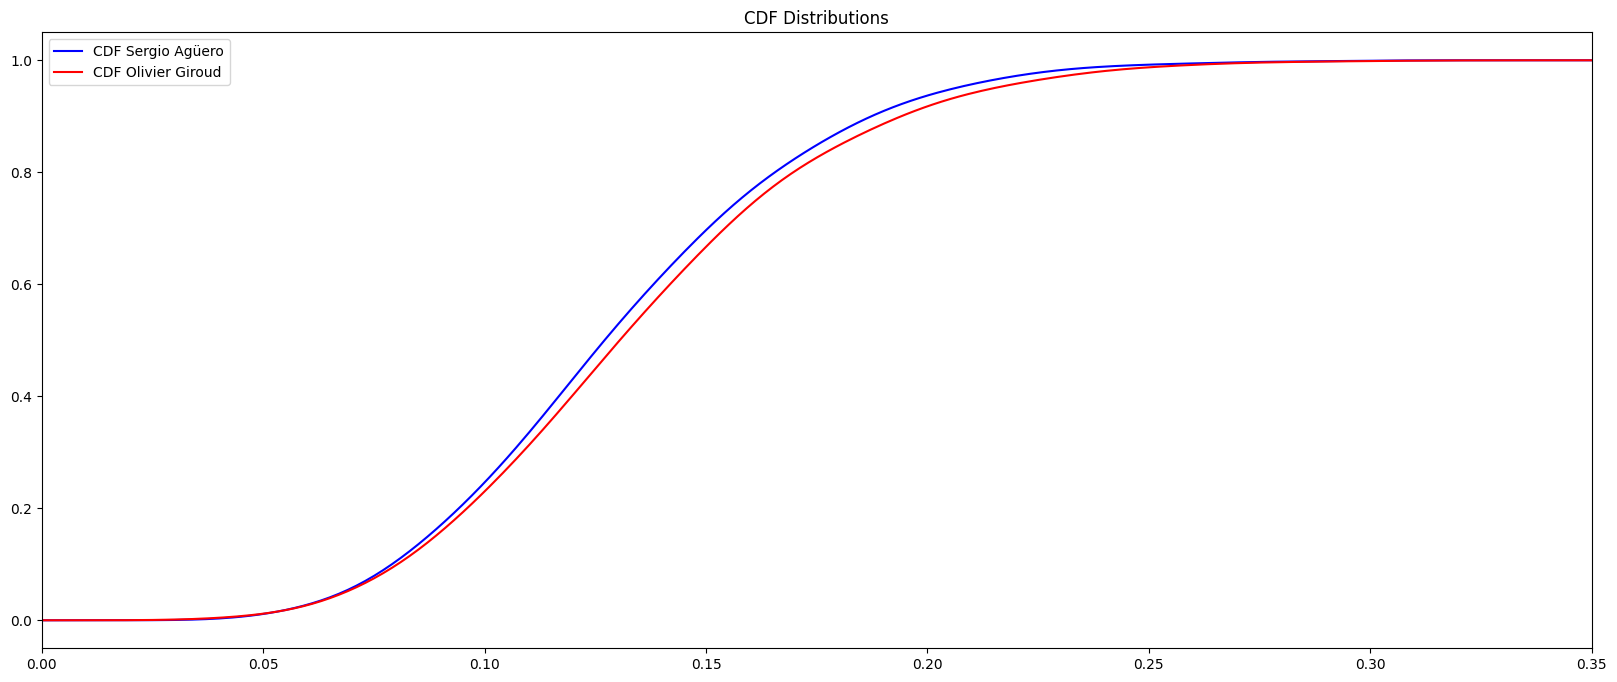

In [ ]:
# Plot CDFs

def plot_psl_cdfs(psls, psls_2, ax=None, names=None, colors=None):
    if names is None:
        names = ["P1", "P2"]

    if colors is None:
        colors = ["b", "r"]

    psl_kde = gaussian_kde(psls)
    psl_kde_2 = gaussian_kde(psls_2)

    x = np.linspace(0, 1, 1000)

    if ax is None:
        _, ax = plt.subplots(figsize=(20, 8))

    # Asegúrate de que x es un array de numpy
    x = np.array(x)

    # Calcula la CDF para cada valor en x
    cdf_1 = np.array([psl_kde.integrate_box_1d(0, xi) for xi in x])
    cdf_2 = np.array([psl_kde_2.integrate_box_1d(0, xi) for xi in x])

    # Grafica las CDFs
    ax.plot(x, cdf_1, color="b", label=f"CDF {names[0]}")
    ax.plot(x, cdf_2, color="r", label=f"CDF {names[1]}")

    ax.legend()

    ax.set_title(
        f"CDF Distributions"
    )

    return None

fig, ax = plt.subplots(figsize=(20, 8))

plot_psl_cdfs(psl_aguero, psl_giroud, ax=ax, names=["Sergio Agüero", "Olivier Giroud"], colors=["b", "r"])

ax.set_xlim(0, 0.35)

fig.savefig("../recursos_pdf/graficos/sergio_aguero_olivier_giroud_cdf.png")

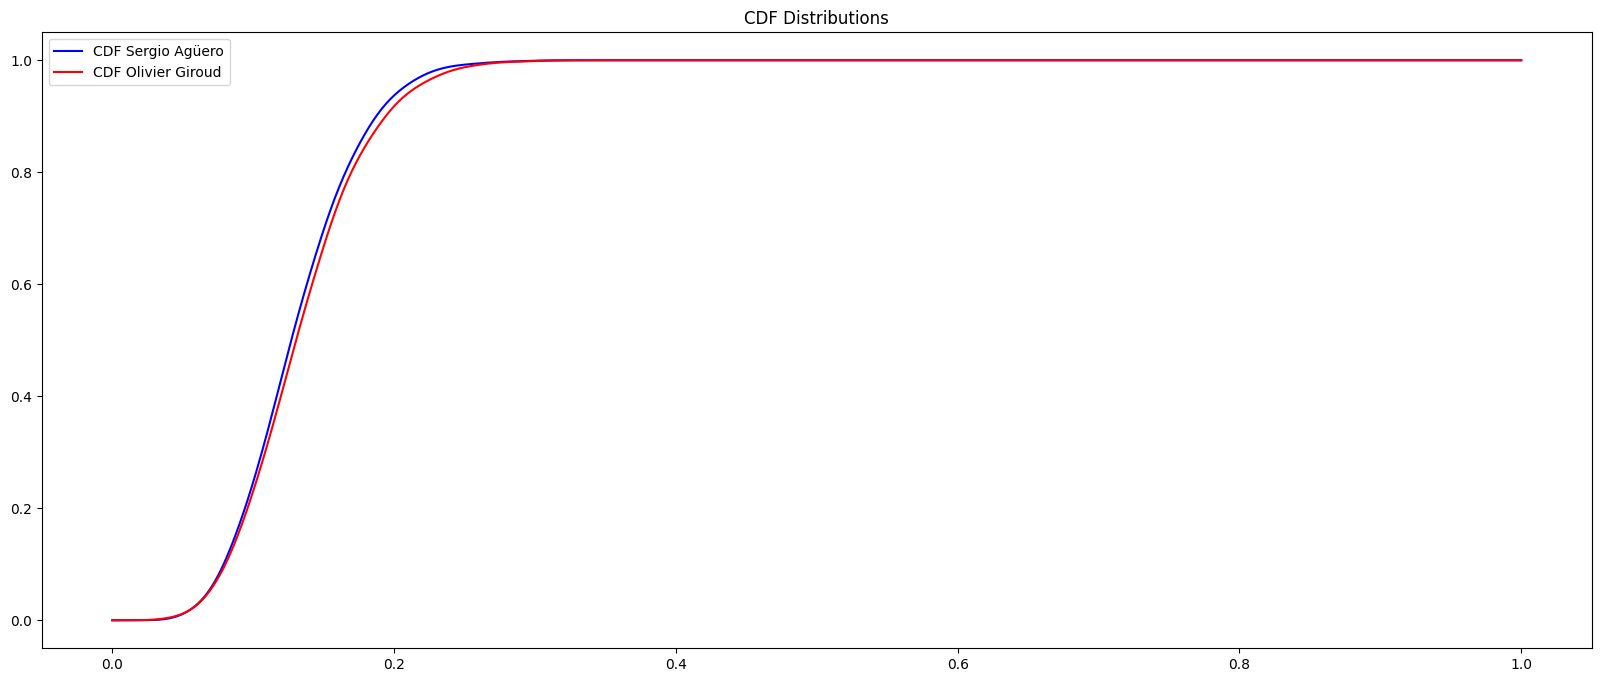

In [66]:
fig, ax = plt.subplots(figsize=(20, 8))

plot_psl_cdfs(
    psl_aguero,
    psl_giroud,
    ax=ax,
    names=["Sergio Agüero", "Olivier Giroud"],
    colors=["b", "r"],
)

# ax.set_xlim(0, 0.35)

fig.savefig("../recursos_pdf/graficos/sergio_aguero_olivier_giroud_cdf.png")

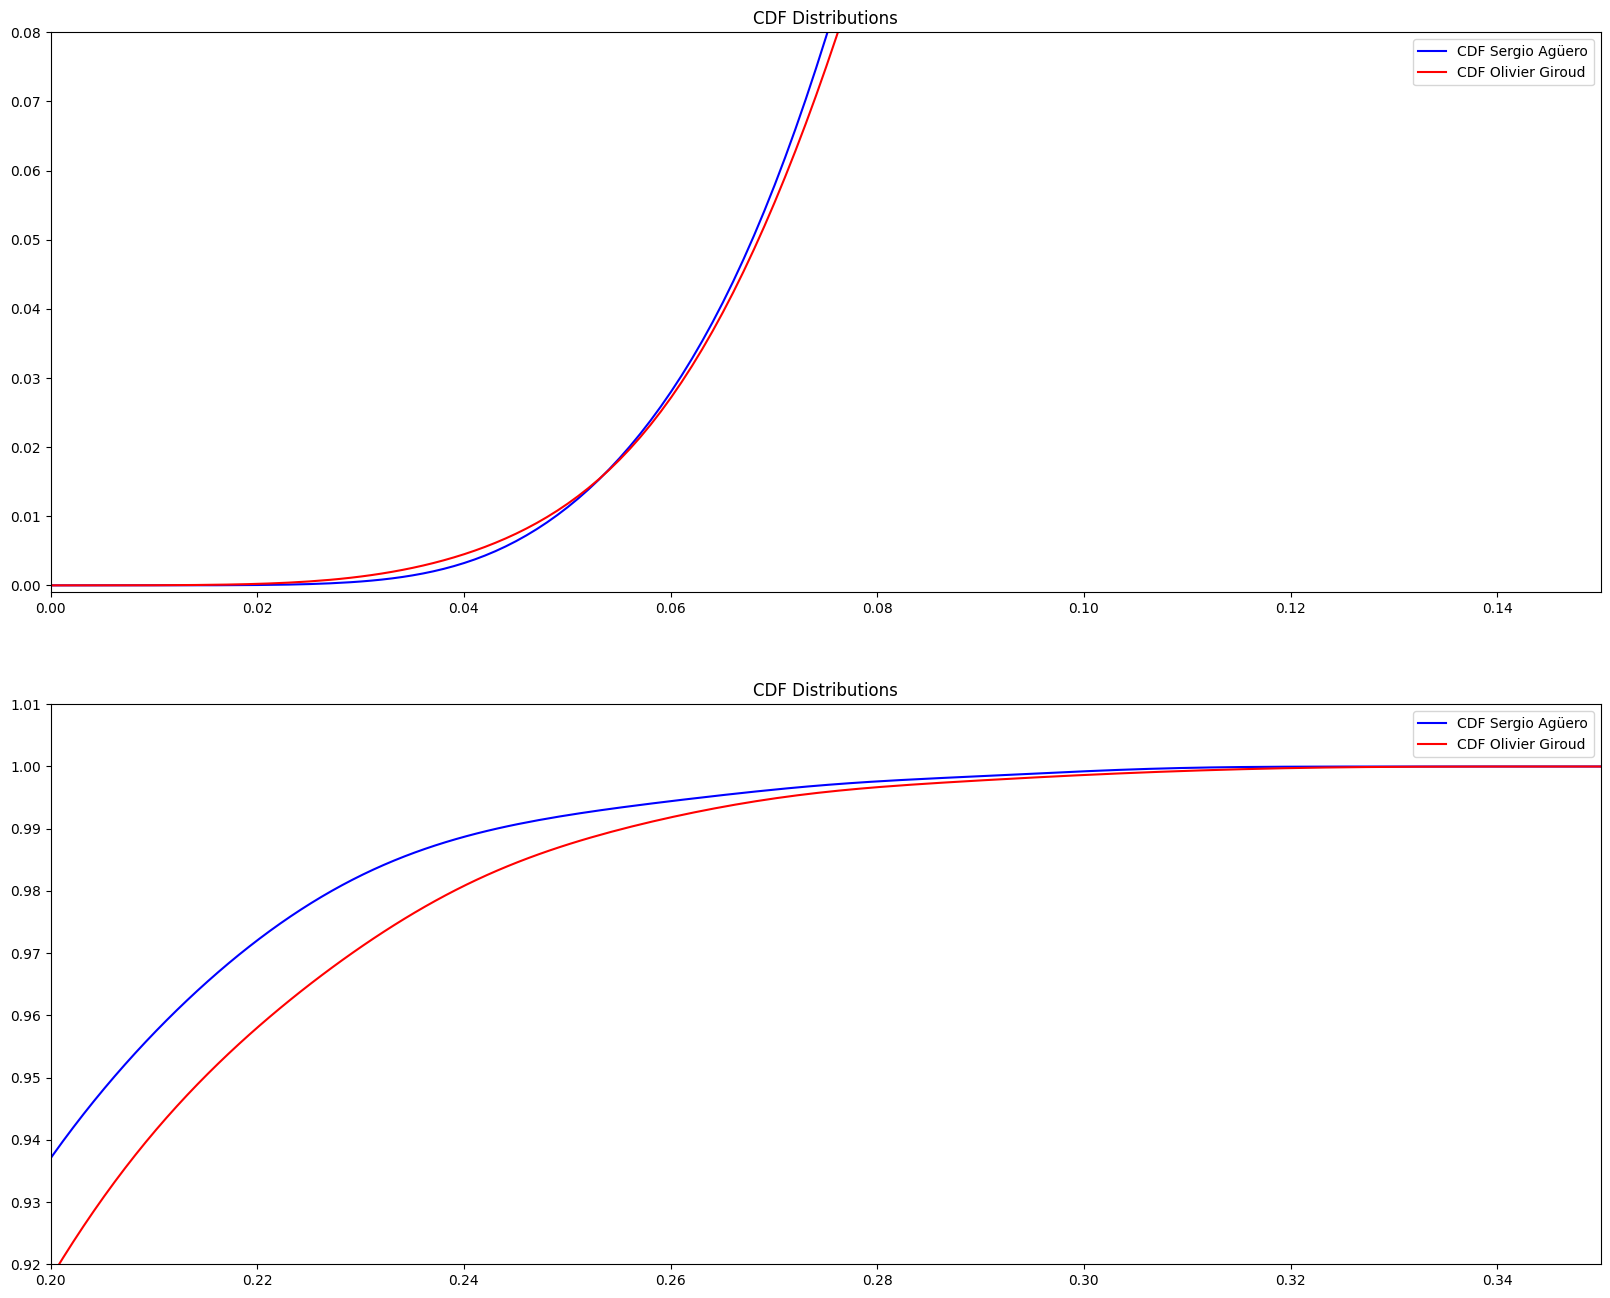

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8*2))

for ax in axs.flatten():
    plot_psl_cdfs(
        psl_aguero,
        psl_giroud,
        ax=ax,
        names=["Sergio Agüero", "Olivier Giroud"],
        colors=["b", "r"],
    )


axs[0].set_xlim(0, 0.15)
axs[0].set_ylim(-0.001, 0.08)

axs[1].set_xlim(0.2, 0.35)
axs[1].set_ylim(0.92, 1.01)

fig.savefig("../recursos_pdf/graficos/sergio_aguero_olivier_giroud_cdf_closeup.png")

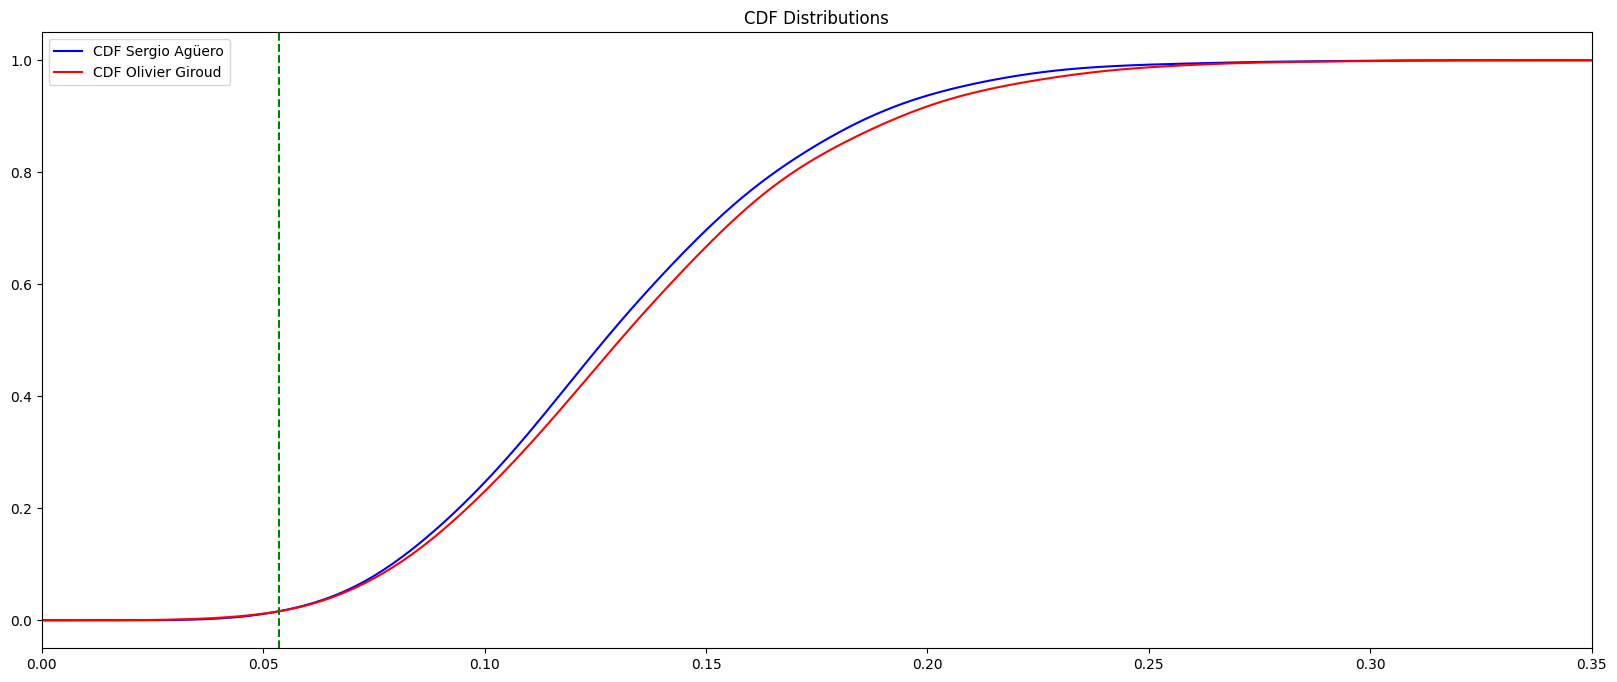

In [ ]:
# CDF intersections

from scipy.optimize import fsolve

def find_intersection(fun1, fun2, x0):
    return fsolve(lambda x: fun1(x) - fun2(x), x0)

psl_kde = gaussian_kde(psl_aguero)
psl_kde_2 = gaussian_kde(psl_giroud)
x = np.linspace(0, 1, 1000)
cdf_1 = np.array([psl_kde.integrate_box_1d(0, xi) for xi in x])
cdf_2 = np.array([psl_kde_2.integrate_box_1d(0, xi) for xi in x])

intersections = find_intersection(
    lambda x: psl_kde.integrate_box_1d(0, x),
    lambda x: psl_kde_2.integrate_box_1d(0, x),
    0.1,
)

fig, ax = plt.subplots(figsize=(20, 8))

plot_psl_cdfs(
    psl_aguero,
    psl_giroud,
    ax=ax,
    names=["Sergio Agüero", "Olivier Giroud"],
    colors=["b", "r"],
)

ax.set_xlim(0, 0.35)

# ax.axvline(intersection, color="g", linestyle="--")

for intersection in intersections:
    ax.axvline(intersection, color="g", linestyle="--")

fig.savefig("../recursos_pdf/graficos/sergio_aguero_olivier_giroud_cdf_intersection.png")

In [67]:
intersections

array([0.05346757])

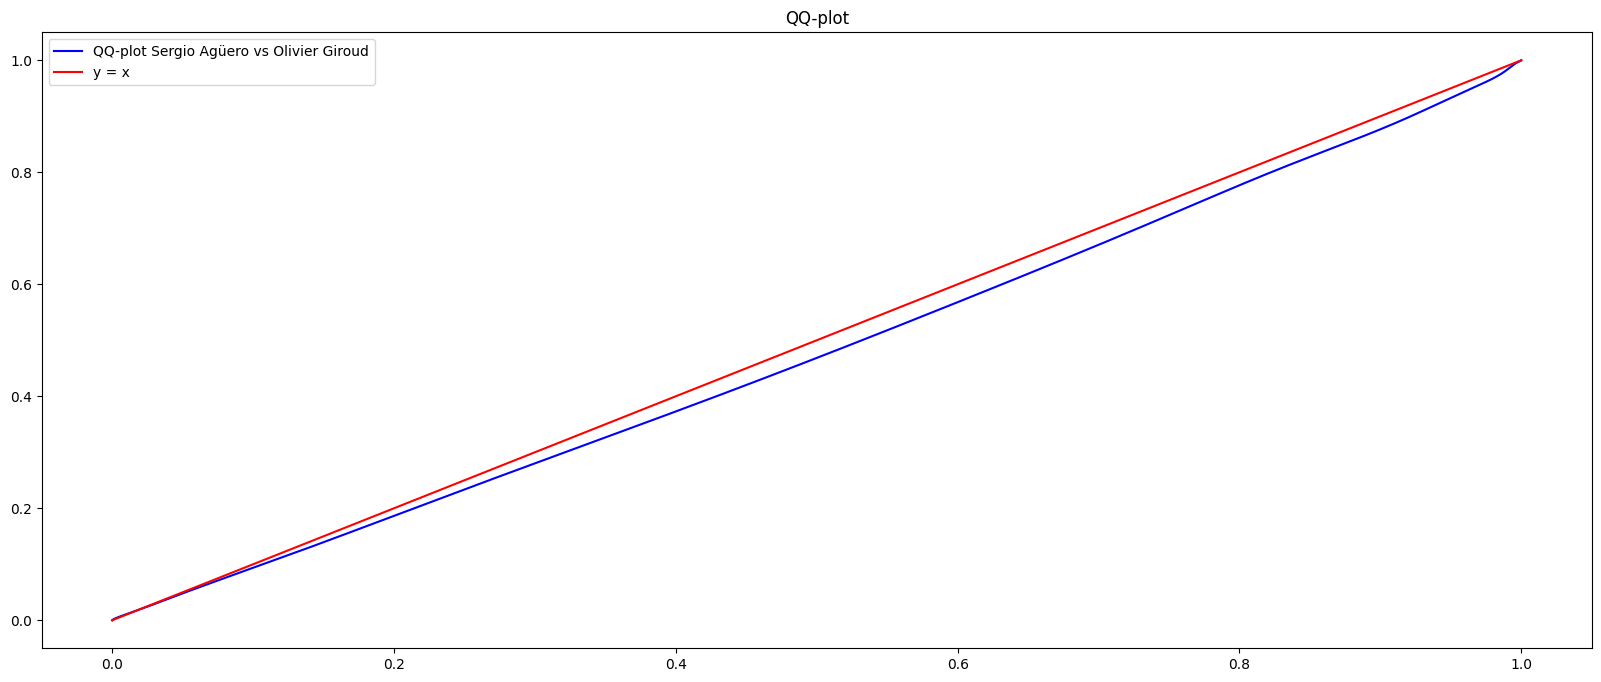

In [20]:
# QQ-plot

fig, ax = plt.subplots(figsize=(20, 8))

def plot_psl_qqplot(psls, psls_2, ax=None, names=None, colors=None):
    if names is None:
        names = ["P1", "P2"]

    if colors is None:
        colors = ["b", "r"]

    psl_kde = gaussian_kde(psls)
    psl_kde_2 = gaussian_kde(psls_2)

    x = np.linspace(0, 1, 1000)

    if ax is None:
        _, ax = plt.subplots(figsize=(20, 8))

    # Asegúrate de que x es un array de numpy
    x = np.array(x)

    # Calcula la CDF para cada valor en x
    cdf_1 = np.array([psl_kde.integrate_box_1d(0, xi) for xi in x])
    cdf_2 = np.array([psl_kde_2.integrate_box_1d(0, xi) for xi in x])

    # Grafica las CDFs
    ax.plot(cdf_1, cdf_2, color="b", label=f"QQ-plot {names[0]} vs {names[1]}")
    
    ax.plot([0, 1], [0, 1], color="r", label="y = x")

    ax.legend()

    ax.set_title(
        f"QQ-plot"
    )

    return None

plot_psl_qqplot(psl_aguero, psl_giroud, ax=ax, names=["Sergio Agüero", "Olivier Giroud"], colors=["b", "r"])


In [ ]:
# Kolmogorov-Smirnov test

from scipy.stats import ks_2samp, anderson_ksamp

ks_2samp(psl_aguero, psl_giroud), anderson_ksamp([psl_aguero, psl_giroud])

(KstestResult(statistic=0.055, pvalue=0.09710349657052789, statistic_location=0.10291472665026086, statistic_sign=1),
 Anderson_ksampResult(statistic=0.3039173317837215, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.25))

In [ ]:
from src.Player2Vec import Player2Vec, EPL_Graph

In [ ]:
EPL_Full_Data

EPL_Data(../SampleData/epl.xlsx, ../SampleData/players.json, R_storage.npy) 
380 Partidos 
522 Jugadores

In [ ]:
epl_graph = EPL_Graph(EPL_Full_Data)

In [ ]:
# Count nodes and edges of epl_graph.graph, .graph is a networkx digraph

# epl_graph.graph.number_of_nodes(), epl_graph.graph.number_of_edges()

print("#Vertices: ", epl_graph.graph.number_of_nodes())
print("#Edges: ", epl_graph.graph.number_of_edges())

#Vertices:  0
#Edges:  0


In [ ]:
epl_graph.load_graph("EPL_Graph_R_Weighted.pkl")

In [ ]:
_ = epl_graph.build_graph(use_Q=False, weight_player_to_state=True)

Building Graph: 100%|██████████| 2795/2795 [23:29<00:00,  1.98it/s]  


In [ ]:
tmp_graph = epl_graph.graph

In [ ]:
# Inverse the weights of the graph

for u, v, d in epl_graph.graph.edges(data=True):
    if "weight" in d:
        d["weight"] = 1 / d["weight"]

In [ ]:
epl_graph.save_graph("EPL_Graph_R_2_Weighted.pkl")

In [ ]:
for u, v, w in epl_graph.graph.edges(data=True):
    print(w)

{'weight': 0.018229223060032128}
{'weight': 0.003360864123208581}
{'weight': 0.024184362453604037}
{'weight': 0.0162066411714517}
{'weight': 0.0023430766632162934}
{'weight': 0.024717076741174467}
{'weight': 0.00964516031235247}
{'weight': 0.012178801436163062}
{'weight': 0.024795034929599412}
{'weight': 0.009619174249544156}
{'weight': 0.010346784008176941}
{'weight': 0.0007492648109730457}
{'weight': 0.02447887116543159}
{'weight': 0.015669595873413215}
{'weight': 0.0028714599403186734}
{'weight': 0.024444223081687172}
{'weight': 0.0066307770265880694}
{'weight': 0.005669292702680458}
{'weight': 0.004395975625073084}
{'weight': 0.024279644683901185}
{'weight': 0.006011442529656591}
{'weight': 0.006474860649738186}
{'weight': 0.008575400726743551}
{'weight': 0.024734400783046683}
{'weight': 0.012018554048845128}
{'weight': 0.007020567968712776}
{'weight': 0.0011520487845019087}
{'weight': 0.024574153395728743}
{'weight': 0.01198390596510071}
{'weight': 0.005244853676811335}
{'weight':

In [ ]:
for u, v, d in epl_graph.graph.edges(data=True):
    if "weight" not in d:
        print(u, v, d)

In [ ]:
total_w = sum(
    [d["weight"] for _, _, d in epl_graph.graph.edges(data=True) if "weight" in d]
)
total_w

39441.07921438691

In [ ]:
total_w = sum(
    [d["weight"] for _, _, d in epl_graph.graph.edges(data=True) if "weight" in d]
)
total_w

466190.5528387795

In [ ]:
import numpy as np

In [ ]:
for u, v, d in epl_graph.graph.edges(data=True):
    if "weight" in d:
        if not np.isfinite(d["weight"] / total_w):
            print(u, v, d["weight"], d["weight"] / total_w)

In [ ]:
p2v_model = Player2Vec(epl_data=EPL_Full_Data)
p2v_model.train(epl_graph.graph, dimensions=64, window=30, num_walks=500, walk_length=40)
p2v_model.export_embeddings_json("inverse_weighted_embeddings_64.json")

Exporting Embeddings: 100%|██████████| 524/524 [00:57<00:00,  9.16it/s, Player 13017] 


In [ ]:
p2v_model.dim_red_embs = None
p2v_model.export_embeddings_json("inverse_weighted_embeddings_64_64_PCA.json", emb_dims=64)

Exporting Embeddings: 100%|██████████| 524/524 [01:02<00:00,  8.37it/s, Player 13017] 


In [ ]:
from itertools import product
import os
from tqdm import tqdm

In [ ]:
param_space = {
    "dimensions": [3, 16, 64],
    "window": [12, 30, 60, 100],
    "num_walks": [500],
    "walk_length": [10, 20, 40, 80, 100],
    "q": [0.5, 0.75, 1.0, 2.0, 4.0],
    "p": [0.5, 0.75, 1.0, 2.0, 4.0]
}

# Random Search
samples = 10
iterator = tqdm(range(samples))

for i in iterator:
    dimensions = np.random.choice(param_space["dimensions"])
    window = np.random.choice(param_space["window"])
    num_walks = np.random.choice(param_space["num_walks"])
    walk_length = np.random.choice(param_space["walk_length"])
    q = np.random.choice(param_space["q"])
    p = np.random.choice(param_space["p"])

    dirname = f"batch_p2v/{dimensions}_{window}_{num_walks}_{walk_length}"
    if os.path.exists(dirname):
        continue

    iterator.set_description(
        f"Training model with dimensions={dimensions}, window={window}, num_walks={num_walks}, walk_length={walk_length}, q={q}, p={p}"
    )
    p2v_m = Player2Vec(epl_data=EPL_Full_Data)
    p2v_m.train(
        epl_graph.graph, dimensions=dimensions, window=window, num_walks=num_walks, walk_length=walk_length, q=q, p=p
    )

    os.mkdir(dirname)
    p2v_m.save_model(f"{dirname}/{dimensions}_{window}_{num_walks}_{walk_length}.model")
    p2v_m.export_embeddings_json(
        f"{dirname}/shots_prob_emb_{dimensions}_{window}_{num_walks}_{walk_length}.json"
    )

Exporting Embeddings: 100%|██████████| 524/524 [00:58<00:00,  9.03it/s, Player 48759]
Training model with dimensions=64, window=30, num_walks=500, walk_length=40, q=0.75, p=0.75: 100%|██████████| 10/10 [4:15:30<00:00, 1533.05s/it]


In [ ]:
# window=30, num_walks=500, walk_length=40
p2v_model.save_model("EPL_p2v_model_R_Weighted_win30_nw500_l40.model")

In [ ]:
p2v_model.model.wv.index_to_key

['Loss',
 'Shot',
 '8432_1_161_2',
 'Loss_1_317_1',
 '11334_0_118_0',
 '41135_1_170_3',
 'Loss_0_334_1',
 'Loss_1_95_3',
 'Loss_1_54_2',
 'Loss_1_278_2',
 'Loss_0_239_2',
 'Loss_0_6_2',
 'Loss_0_250_3',
 'Loss_1_155_2',
 '59936_1_180_3',
 'Loss_0_316_2',
 'Loss_0_260_1',
 '20467_1_180_3',
 'Loss_0_81_2',
 'Loss_1_54_1',
 'Loss_1_229_2',
 'Loss_0_136_1',
 'Loss_0_340_2',
 'Loss_1_319_1',
 'Loss_0_20_1',
 'Loss_1_57_1',
 'Loss_0_241_2',
 'Loss_1_99_2',
 'Loss_1_228_2',
 'Loss_0_6_0',
 'Loss_1_325_0',
 'Loss_1_317_2',
 'Loss_0_186_3',
 'Loss_0_161_1',
 'Loss_0_219_0',
 'Loss_1_129_0',
 'Loss_1_220_2',
 'Loss_0_161_2',
 'Loss_1_65_0',
 'Loss_0_211_1',
 'Loss_0_317_1',
 'Loss_1_288_1',
 'Loss_0_369_0',
 'Loss_0_136_2',
 'Loss_0_101_2',
 'Loss_0_272_1',
 'Loss_1_228_0',
 'Loss_1_198_0',
 'Loss_0_125_1',
 '9089_1_7_3',
 'Loss_1_339_2',
 'Loss_1_53_2',
 'Loss_1_35_0',
 'Loss_0_355_0',
 '19419_1_170_3',
 'Loss_0_124_2',
 '77305_0_55_3',
 'Loss_1_376_2',
 'Loss_1_142_1',
 'Loss_1_228_1',
 'Loss_

In [ ]:
p2v_model.tsne_embs = p2v_model.dim_reduce(n_components=3)

In [ ]:
ids = p2v_model.get_ids()

def isPlayerId(x):
    if "_" in x:
        return False
    try:
        int(x)
        return True
    except ValueError:
        # print(f"Player {player_id} not in model")
        return False
    return False

# ids = list(filter(isPlayerId, ids))

p2v_model.tsne_embs = {ids[i]: p2v_model.tsne_embs[i] for i in range(len(ids)) if isPlayerId(ids[i])}

{'11378': array([-28.927488 ,   1.0907452,  18.089897 ], dtype=float32),
 '52876': array([-35.087646,   1.549789,  21.254404], dtype=float32),
 '77800': array([-22.109753 ,   1.5635644,  15.885147 ], dtype=float32),
 '49539': array([-28.681047 ,   0.8500212,  20.918598 ], dtype=float32),
 '50471': array([-33.814095  ,   0.70177513,  16.472633  ], dtype=float32),
 '41080': array([-21.742168,   0.727029,  18.928858], dtype=float32),
 '15903': array([-24.754282 ,   6.2983265,  24.212906 ], dtype=float32),
 '28146': array([-28.618277 ,  -4.2242336,  18.89432  ], dtype=float32),
 '56981': array([-30.872026,   4.546364,  19.295399], dtype=float32),
 '28301': array([-31.610971  ,   0.18842304,  21.950758  ], dtype=float32),
 '11467': array([-33.81542  ,  -3.0109794,  17.34886  ], dtype=float32),
 '42427': array([-34.017292 ,   1.3717015,  20.428627 ], dtype=float32),
 '56069': array([-26.940594 ,  -1.6019657,  22.2055   ], dtype=float32),
 '44683': array([-31.159931  ,  -0.13778774,  14.24389

In [ ]:
p2v_model.tsne_embs = {
    ids[i]: p2v_model.tsne_embs[i] for i in range(len(ids)) if isPlayerId(ids[i])
}

In [ ]:
p2v_model.dims = 64
p2v_model.tsne_embs = None
p2v_model.export_embeddings_json("shots_prob_emb_ds_R_W_64_TSNE_win30_nw500_l40.json")

Exporting Embeddings: 100%|██████████| 524/524 [00:58<00:00,  8.90it/s, Player 42727] 


In [ ]:
model_path = "EPL_Graph_model_3_Weight_Duration_Q.model"
# model_path = "EPL_Graph_model_3__R_Weighted.model"
p2v_model = Player2Vec(model_path=model_path, epl_data=EPL_Full_Data)

In [ ]:
len(set([p_id.split("_")[0] for p_id in p2v_model.get_ids()]))

525

In [ ]:
len([p_id for p_id in p2v_model.get_ids() if "_" not in p_id])

524

In [ ]:
def display_similarities(player_name: str, topn=10, same_position=True):
    id_sample_player = p2v_model.epl_player_data.get_player_id_by_name(player_name)
    sample_team = p2v_model.get_team_name(player_name)
    sample_position = p2v_model.epl_player_data.get_player_position(id_sample_player)

    total = len([x for x in p2v_model.get_ids()])

    most_similar = p2v_model.model.wv.most_similar(f"{id_sample_player}___", topn=total)
    count = 0
    for player_id, similarity in most_similar:
        if player_id.split("_")[0] in ["Gain", "Loss", "Shot"]:
            continue
        if count == topn:
            break
        # if "_" in player_id and "___" not in player_id:
            # continue
        if "_" in player_id:
            continue
        player_id = p2v_model.rework_id(player_id)
        player_name = p2v_model.epl_player_data.get_player_name(player_id)
        team = p2v_model.get_team_name(player_id)
        position = p2v_model.epl_player_data.get_player_position(player_id)

        if (
            True
            and (sample_team != team) 
            and (position == sample_position or not same_position)
        ):
            count += 1
            print(f"{player_name} {player_id} ({team}): {similarity} - {position}")


display_similarities("Sergio Agüero")

Magaye Gueye 57835 (Swansea City): 0.9999375343322754 - F
Sammy Ameobi 97612 (Newcastle United): 0.9952880144119263 - F
Apostolos Vellios 60865 (Everton): 0.9924089908599854 - F
Louis Saha 4396 (Arsenal): 0.9734461307525635 - F
Loïc Rémy 38419 (West Ham United): 0.9673224091529846 - F
Luciano Becchio 19791 (Queens Park Rangers): 0.9668170213699341 - F
Shola Ameobi 6240 (Everton): 0.9603272080421448 - F
Michael Owen 1795 (Stoke City): 0.9582937955856323 - F
Romelu Lukaku 66749 (West Bromwich Albion): 0.9410472512245178 - F
Rickie Lambert 11037 (Manchester City): 0.9362635016441345 - F


In [ ]:
p2v_model.model.wv.similarity(
    f"{p2v_model.epl_player_data.get_player_id_by_name('Sergio Agüero')}",
    f"{p2v_model.epl_player_data.get_player_id_by_name('Olivier Giroud')}",
)

0.98547244

In [ ]:
# Cosine similarity between two players
p2v_model.model.wv.similarity(
    f"{p2v_model.epl_player_data.get_player_id_by_name('Sergio Agüero')}___",
    f"{p2v_model.epl_player_data.get_player_id_by_name('Olivier Giroud')}___",
)
    

0.9863141

In [ ]:
similars = p2v_model.get_similar_players("Mario Balotelli", 10)
similars

[('Raheem Sterling', 103955, 'Liverpool', 0.9999727606773376, 'F'),
 ('Magaye Gueye', 57835, 'Swansea City', 0.999930202960968, 'F'),
 ('Demba Ba', 47412, 'Newcastle United', 0.9998716711997986, 'F'),
 ('Lukas Podolski', 17733, 'Arsenal', 0.9996523261070251, 'F'),
 ('Junior Hoilett', 49806, 'Queens Park Rangers', 0.999647319316864, 'F'),
 ('Peter Odemwingie', 26900, 'West Bromwich Albion', 0.999541163444519, 'F'),
 ('Mladen Petric', 11987, 'Fulham', 0.9994903206825256, 'F'),
 ('Carlton Cole', 12799, 'West Ham United', 0.9994598627090454, 'F'),
 ('Shane Long', 20452, 'West Bromwich Albion', 0.9992810487747192, 'F'),
 ('Demba Ba', 47412, 'Newcastle United', 0.9992643594741821, 'F')]

In [ ]:
player_comparison.rank_players(
    "Sergio Agüero",
    [s[0] for s in similars],
)

 15%|█▌        | 154/1000 [00:09<00:52, 16.10it/s]


KeyboardInterrupt: 